In [1]:
#1. Implement two layer Feed Forward Neural Network for XOR Logic 
#Gate with 2-bit Binary Input using Sigmoid activation. 
#Verify the number of learnable parameters in the model.

import torch
import torch.nn as nn
import torch.optim as optim


class XORNeuralNetwork(nn.Module):
    def __init__(self, input_size=2, hidden_size=4):
        super(XORNeuralNetwork, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Sigmoid()
        )

        self.layer2 = nn.Sequential(
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

X = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = torch.tensor([[0.], [1.], [1.], [0.]])

model = XORNeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

for epoch in range(10000):
    outputs = model(X)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("XOR Predictions:")
with torch.no_grad():
    for i in range(len(X)):
        prediction = model(X[i].unsqueeze(0))
        print(f"{X[i].numpy()} → {round(prediction.item())}")
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal Learnable Parameters: {total_params}")

XOR Predictions:
[0. 0.] → 0
[0. 1.] → 1
[1. 0.] → 1
[1. 1.] → 0

Total Learnable Parameters: 17


In [5]:
#2. Repeat Qn 1 by modifying the activation function to ReLU.
class XORNeuralNetwork(nn.Module):
    def __init__(self, input_size=2, hidden_size=4):
        super(XORNeuralNetwork, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU()
        )

        self.layer2 = nn.Sequential(
            nn.Linear(hidden_size, 1),
            nn.Sigmoid() 
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x


X = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = torch.tensor([[0.], [1.], [1.], [0.]])

model = XORNeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

for epoch in range(10000):
    outputs = model(X)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("XOR Predictions:")
with torch.no_grad():
    for i in range(len(X)):
        prediction = model(X[i].unsqueeze(0))
        print(f"{X[i].numpy()} → {round(prediction.item())}")
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal Learnable Parameters: {total_params}")

XOR Predictions:
[0. 0.] → 0
[0. 1.] → 0
[1. 0.] → 1
[1. 1.] → 0

Total Learnable Parameters: 17


In [6]:
#Q3Manually verify the output values by taking system generated values 
#of weights and biases for both Linear1 and Linear2 layers for Qn 1
#and apply the transformations to input X and implement the same.
import numpy as np
torch.manual_seed(42)
np.random.seed(42)
class ManualXORVerification:
    def __init__(self):
        self.model = nn.Sequential(
            nn.Linear(2, 4),
            nn.Sigmoid(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )

        self.W1 = self.model[0].weight.detach().numpy()
        self.b1 = self.model[0].bias.detach().numpy()
        self.W2 = self.model[2].weight.detach().numpy()
        self.b2 = self.model[2].bias.detach().numpy()

    def manual_forward(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        z1 = np.dot(X, self.W1.T) + self.b1
        a1 = 1 / (1 + np.exp(-z1))
        z2 = np.dot(a1, self.W2.T) + self.b2
        a2 = 1 / (1 + np.exp(-z2))

        return a2

    def pytorch_forward(self, X):
        return self.model(X).detach().numpy()

    def verify_transformations(self):
        X = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])

        print("Weights and Biases Details:")
        print("Layer 1 Weights (W1):\n", self.W1)
        print("\nLayer 1 Bias (b1):\n", self.b1)
        print("\nLayer 2 Weights (W2):\n", self.W2)
        print("\nLayer 2 Bias (b2):\n", self.b2)

        print("\nInput Transformations:")
        for i in range(len(X)):
            x_numpy = X[i].numpy()
            manual_out = self.manual_forward(x_numpy)
            pytorch_out = self.pytorch_forward(X[i].unsqueeze(0))

            print(f"\nInput {x_numpy}:")
            print(f"Manual Forward: {manual_out}")
            print(f"PyTorch Forward: {pytorch_out}")
            print(f"Predicted Output: {round(manual_out[0][0])}")
verification = ManualXORVerification()
verification.verify_transformations()

Weights and Biases Details:
Layer 1 Weights (W1):
 [[ 0.5406104   0.5869042 ]
 [-0.16565566  0.6495563 ]
 [-0.15492962  0.14268756]
 [-0.3442585   0.41527155]]

Layer 1 Bias (b1):
 [ 0.62334496 -0.5187534   0.6146145   0.13234161]

Layer 2 Weights (W2):
 [[ 0.36940444  0.06771529  0.24109405 -0.0705955 ]]

Layer 2 Bias (b2):
 [0.3854429]

Input Transformations:

Input [0. 0.]:
Manual Forward: [[0.6835259]]
PyTorch Forward: [[0.6835259]]
Predicted Output: 1

Input [0. 1.]:
Manual Forward: [[0.69539857]]
PyTorch Forward: [[0.69539857]]
Predicted Output: 1

Input [1. 0.]:
Manual Forward: [[0.69122565]]
PyTorch Forward: [[0.69122565]]
Predicted Output: 1

Input [1. 1.]:
Manual Forward: [[0.7006481]]
PyTorch Forward: [[0.7006481]]
Predicted Output: 1


Epoch [1/5], Loss: 0.3471
Epoch [2/5], Loss: 0.1380
Epoch [3/5], Loss: 0.0936
Epoch [4/5], Loss: 0.0714
Epoch [5/5], Loss: 0.0551
Test Accuracy: 97.54%


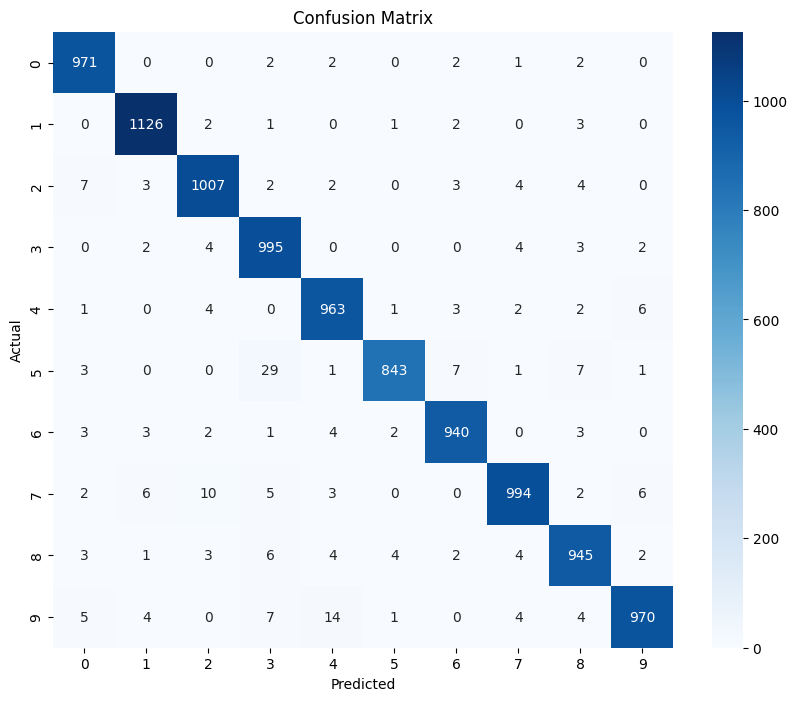

Total Learnable Parameters: 109386


In [1]:
#4QImplement Feed Forward Neural Network with two hidden layers for 
#classifying handwritten digits using MNIST dataset. Display the 
#classification accuracy in the form of a Confusion matrix.
#Verify the number of learnable parameters in the model.
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


class MNISTNeuralNetwork(nn.Module):
    def __init__(self, input_size=784, hidden1_size=128, hidden2_size=64, num_classes=10):
        super(MNISTNeuralNetwork, self).__init__()

        self.fc_layers = nn.Sequential(
            nn.Linear(input_size, hidden1_size),
            nn.ReLU(),
            nn.Linear(hidden1_size, hidden2_size),
            nn.ReLU(),
            nn.Linear(hidden2_size, num_classes)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  
        return self.fc_layers(x)


def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')


def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


def count_parameters(model):
    return sum(p.numel() for p in model.parameters())
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
model = MNISTNeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model(model, train_loader, criterion, optimizer)
evaluate_model(model, test_loader)
total_params = count_parameters(model)
print(f'Total Learnable Parameters: {total_params}')